# cygnus-victim
Analysis of how Cygnus prefetches interact with the lines they replace ("victims").

In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
from utils import utils

In [2]:
cygnus_dir = '/scratch/cluster/cmolder/pythia/degree1_featureless_tuned_nozeroaction/'

suites = [('spec06', 'one_phase'), ('gap', 'one_phase')]

In [5]:
def load_cygnus_secondary_stats(path: str):
    avg_timeliness = {}
    avg_lateness = {}
    avg_earliness = {}
    victim_referenced = {}
    with open(path) as f:
        for line in f:
            if 'victim ref:' in line:
                action = line.split()[0]
                if action == 'total':
                    continue
                avg_timeliness[int(action)] = float(line.split()[3])
                avg_lateness[int(action)] = float(line.split()[6])
                avg_earliness[int(action)] = float(line.split()[9])
                victim_referenced[int(action)] = float(line.split()[12])
    return avg_timeliness, avg_lateness, avg_earliness, victim_referenced

def get_trace_path(exp_dir, trace, prefetcher, seed=1337):
    if 'cygnus' in prefetcher:
        pref_degree = 0
    else:
        pref_degree = 1

    results_file = f'{trace}-l2pf_{prefetcher}_{pref_degree}-seed_{seed}.txt'
    return os.path.join(exp_dir, 'champsim_results', results_file)

# Action distribution tables

In [6]:
def dict_to_table(dict, trace):
    return pd.DataFrame(dict[trace]).astype(float).sort_index()

In [7]:
timeliness_tables, lateness_tables, earliness_tables, victim_tables = {}, {}, {}, {}
for suite, _ in suites:
    for trace, phase in utils.phases['one_phase'].items():
        if trace in utils.suites[suite]:
            full_trace = f'{trace}_{phase}' if phase != 'default' else trace
            timeliness_tables[full_trace] = {}
            lateness_tables[full_trace] = {}
            earliness_tables[full_trace] = {}
            victim_tables[full_trace] = {}
            
            tt, lt, et, vt = load_cygnus_secondary_stats(get_trace_path(cygnus_dir, full_trace, 'cygnus'))

            timeliness_tables[full_trace]['cygnus'] = tt
            lateness_tables[full_trace]['cygnus'] = lt
            earliness_tables[full_trace]['cygnus'] = et
            victim_tables[full_trace]['cygnus'] = vt

## Victim selection

### mcf_46B

In [8]:
dict_to_table(victim_tables, 'mcf_46B')

,cygnus
-6,0.5
-3,0.5
-1,0.4
1,0.4
3,0.6
4,0.5
5,0.5
10,0.4
11,0.4
12,0.3


# Action distribution plots

In [21]:
def dict_to_plot(dict, trace, prefetcher, color='C0', stat=''):
    fig, ax = plt.subplots()
    df = dict_to_table(dict, trace)[prefetcher]
    df.plot.bar(ax=ax, figsize=(8, 3), color=color)

    ax.set_xlabel('Action')
    ax.set_ylabel(f'{stat}')
    ax.set_axisbelow(True)
    ax.grid(axis='y', zorder=0)    

    fig.suptitle(f'{prefetcher} {stat.lower()} on {trace}')

### Victim selection

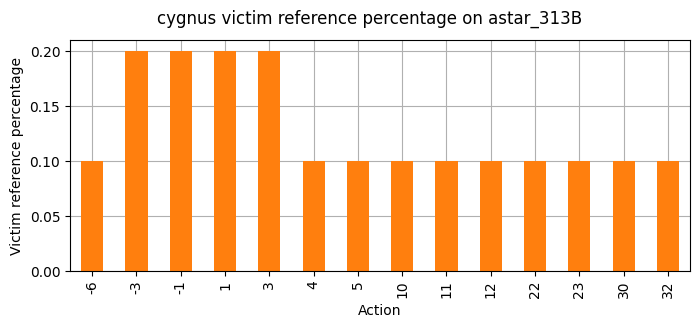

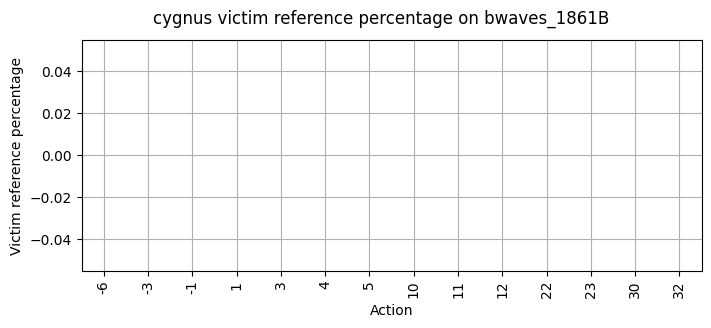

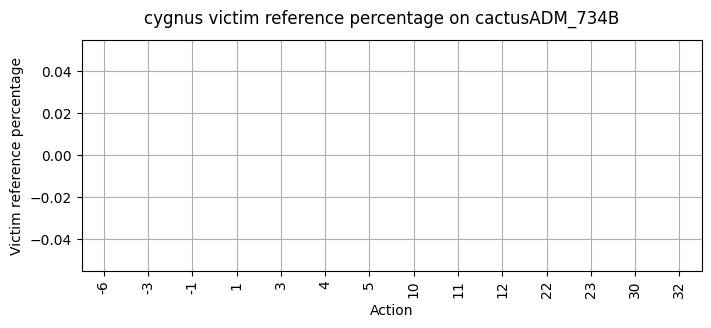

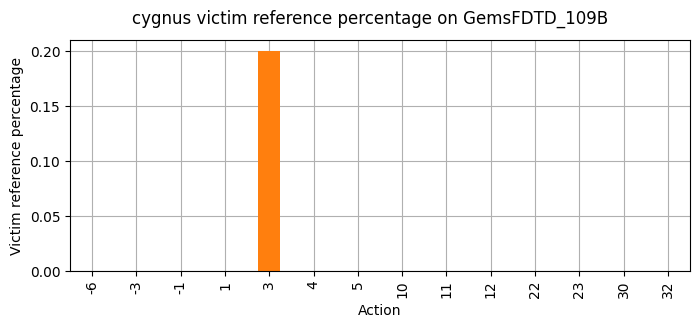

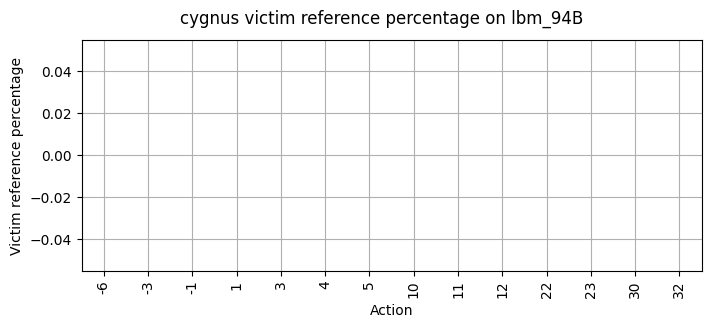

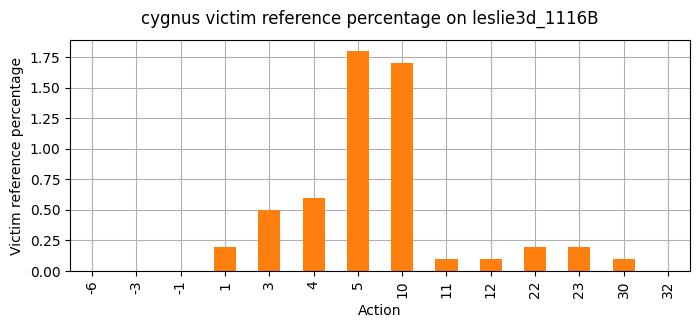

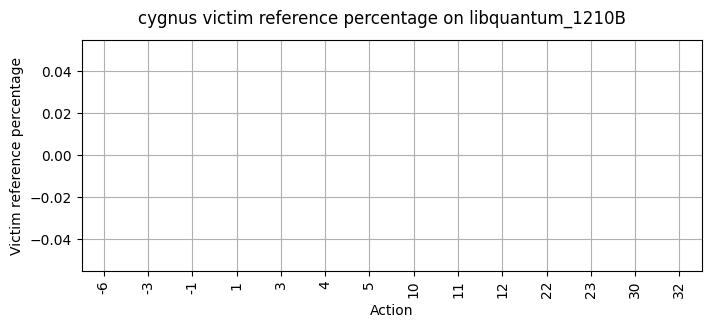

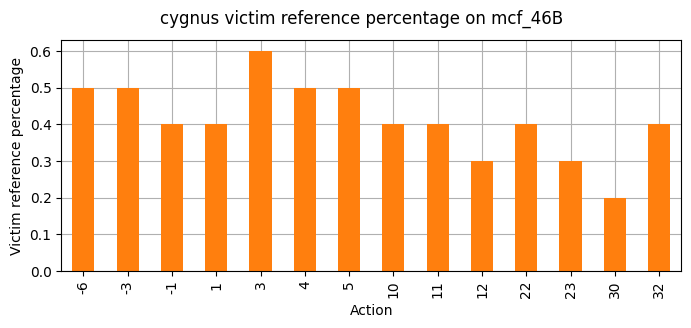

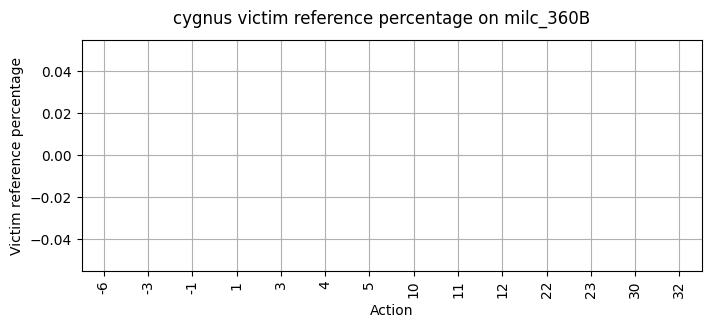

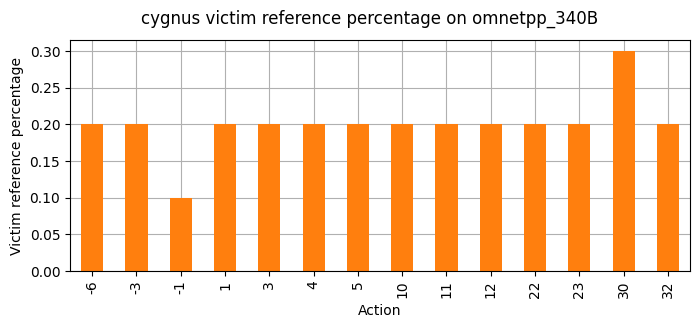

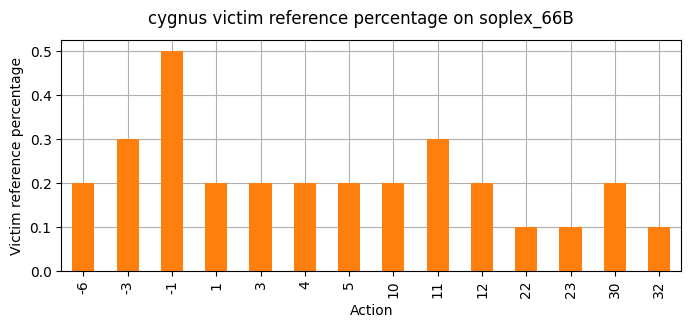

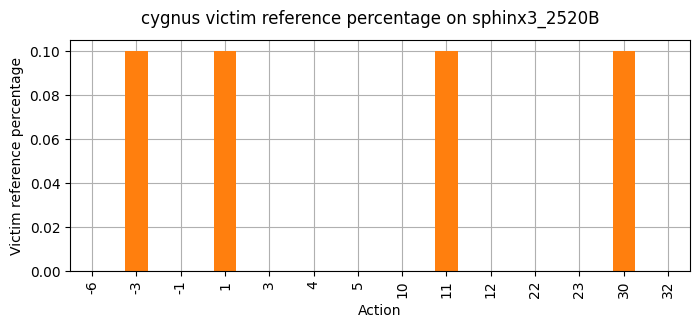

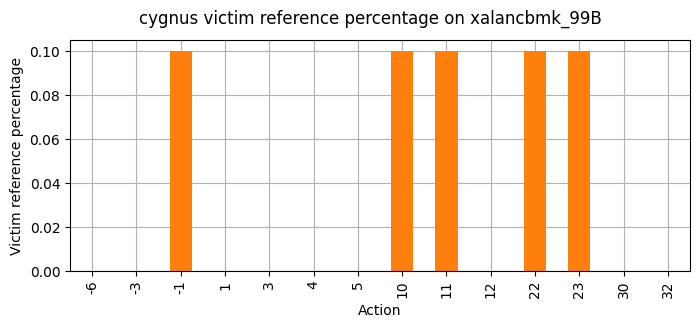

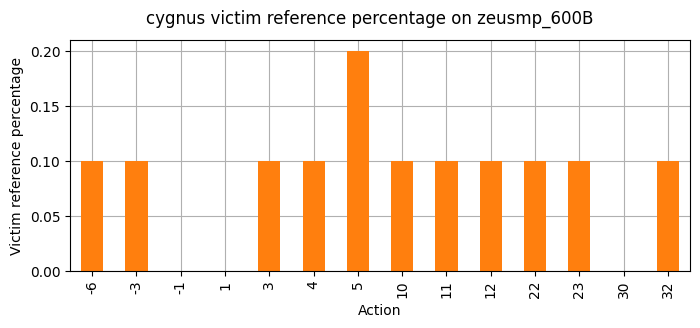

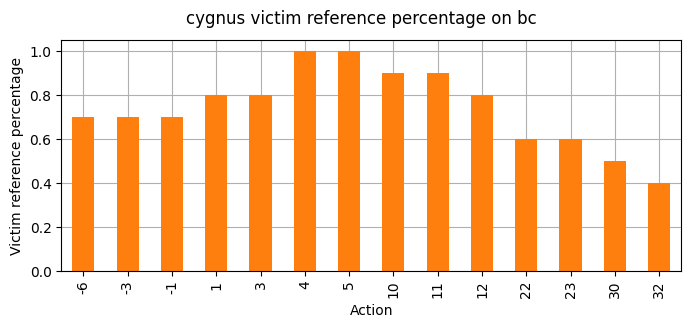

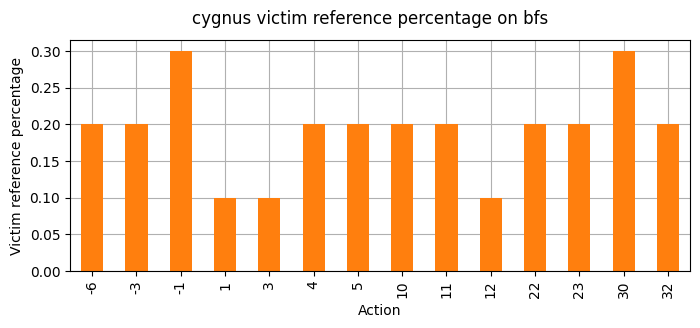

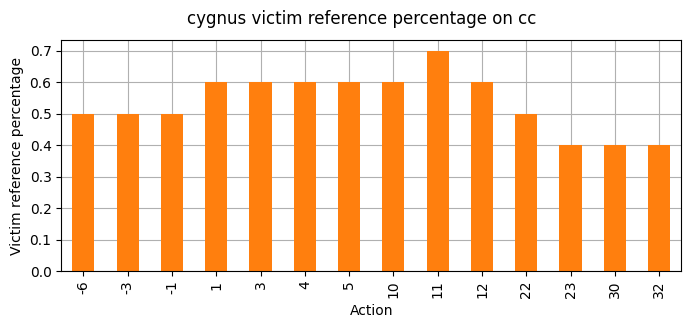

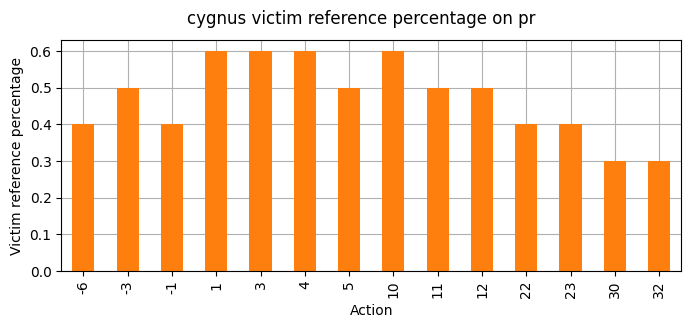

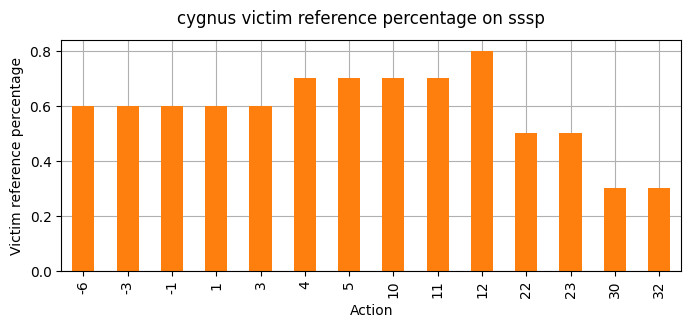

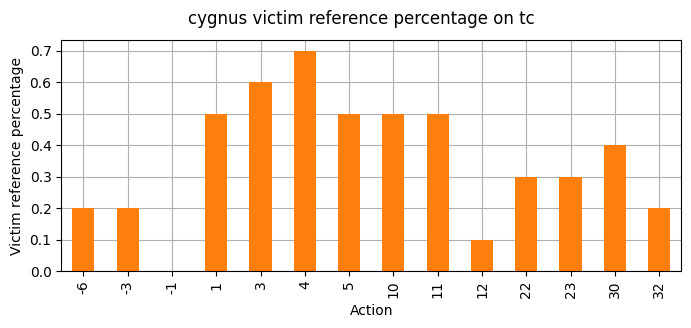

In [22]:
for trace in victim_tables.keys():
    dict_to_plot(victim_tables, trace, 'cygnus', color='C1', stat="Victim reference percentage")


## Avg. timeliness

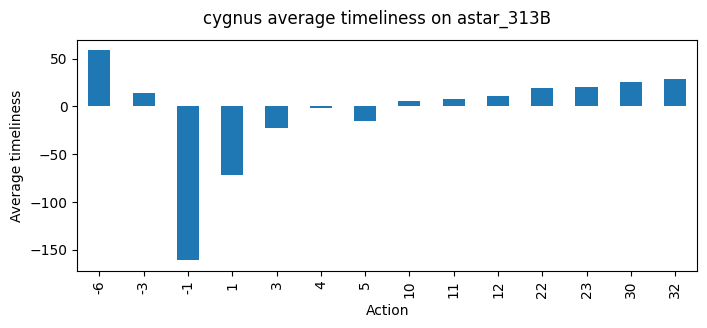

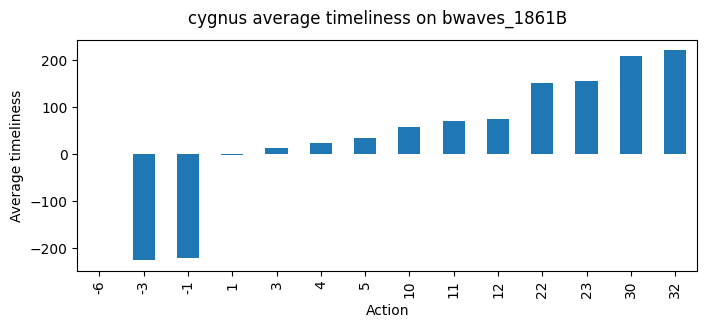

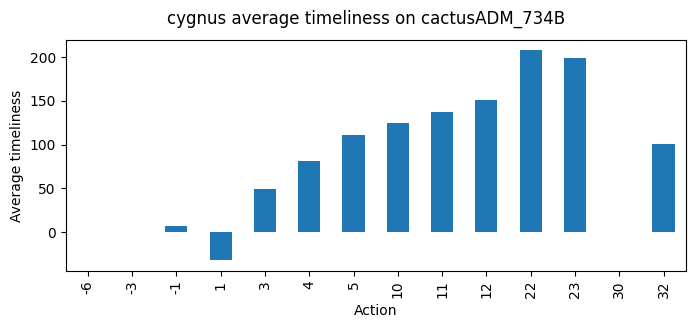

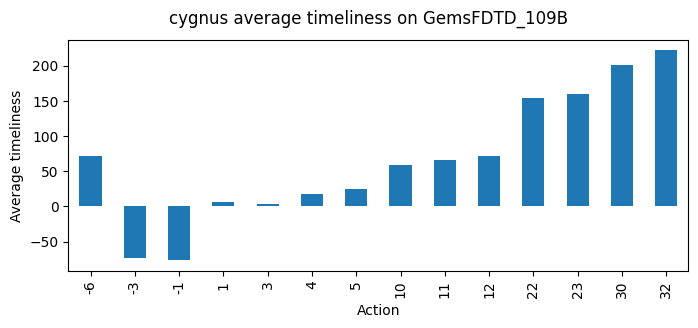

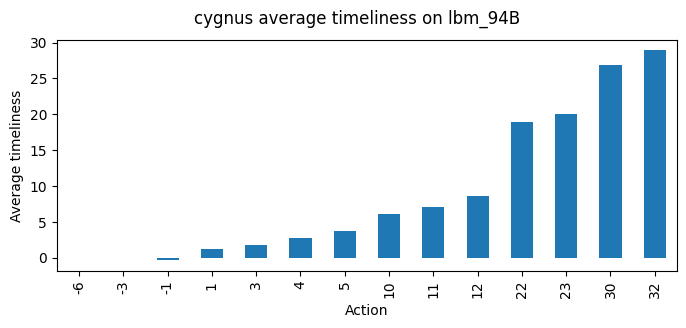

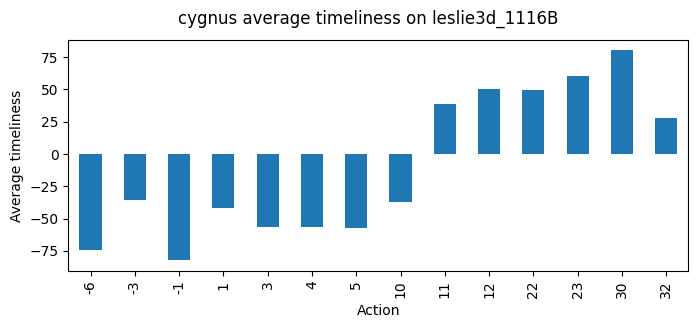

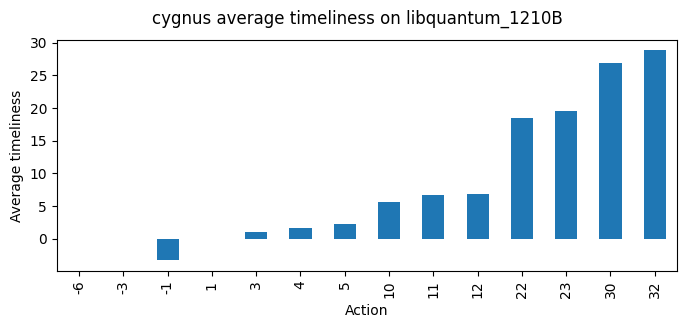

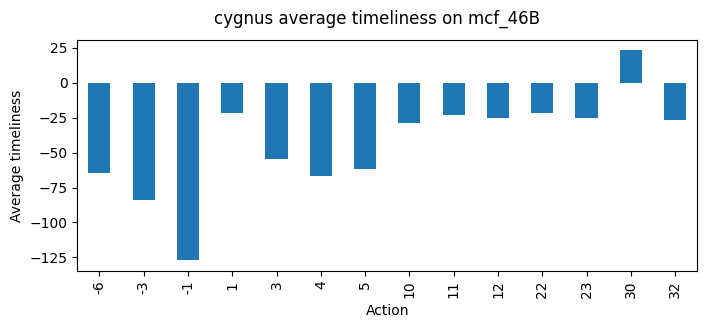

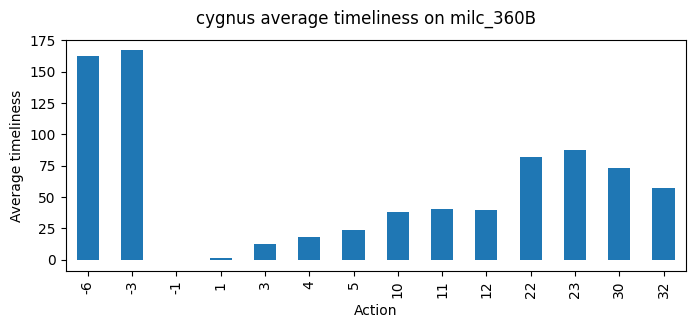

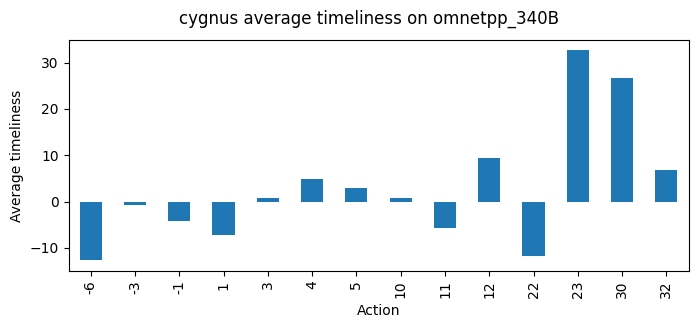

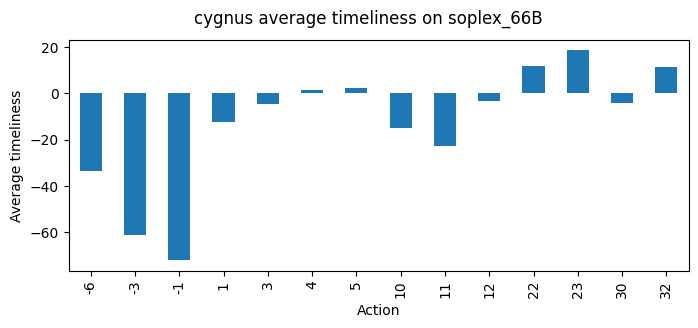

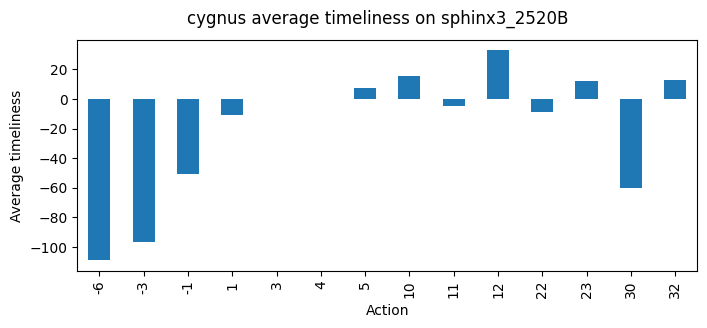

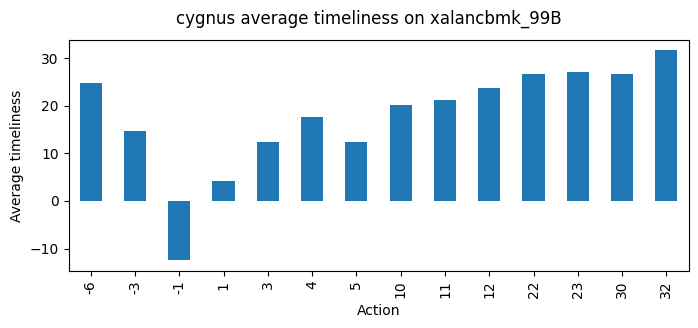

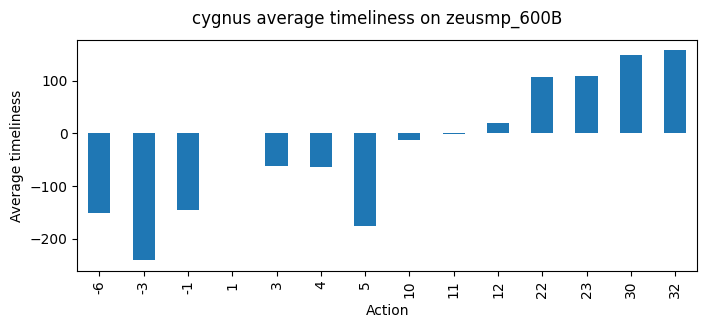

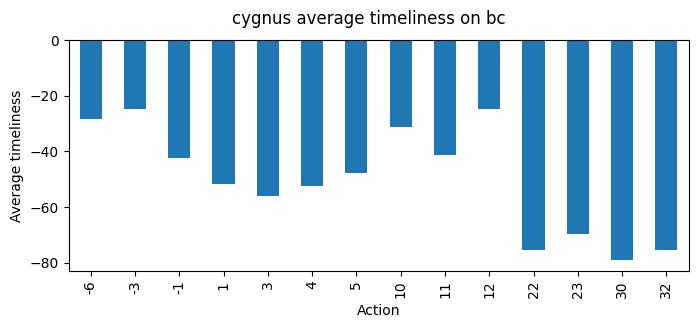

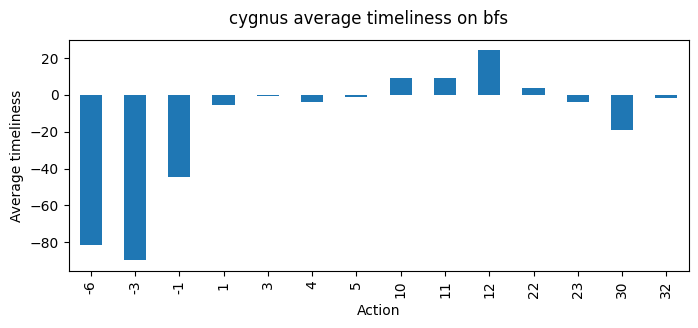

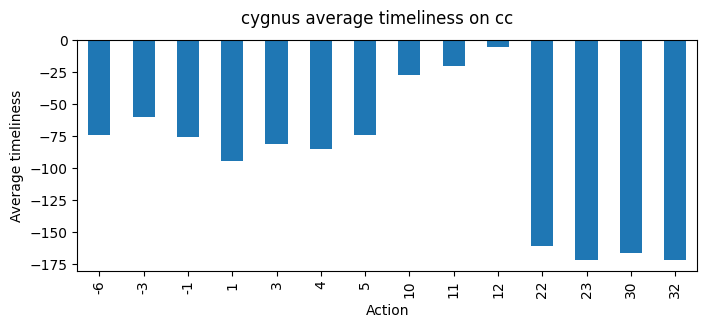

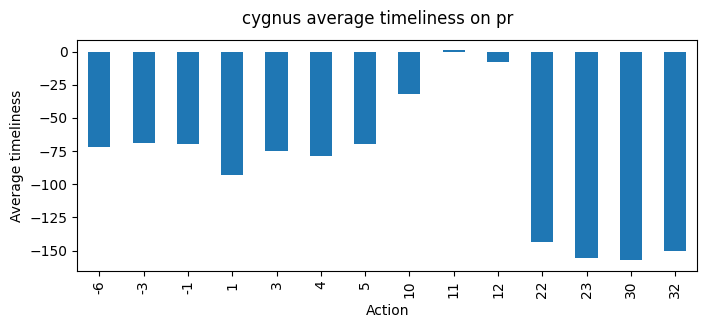

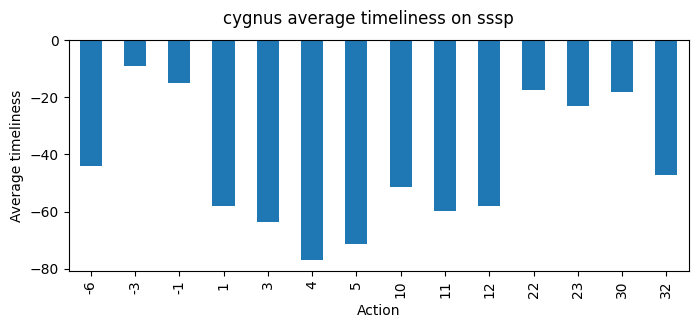

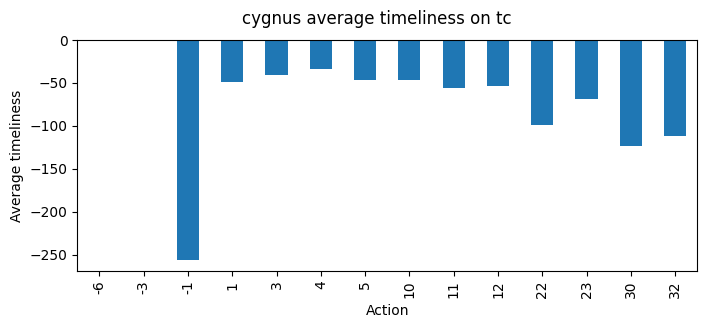

In [18]:
for trace in victim_tables.keys():
    dict_to_plot(timeliness_tables, trace, 'cygnus', color='C0', stat="Average timeliness")

## Avg. earliness

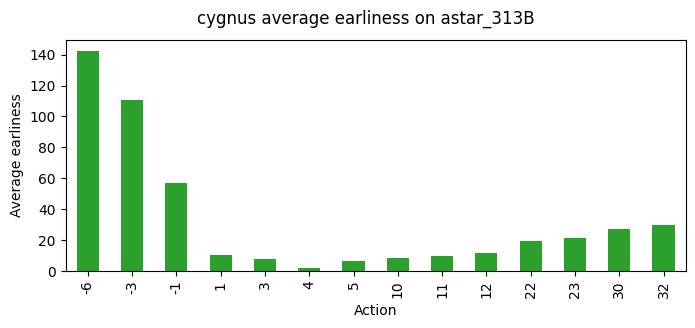

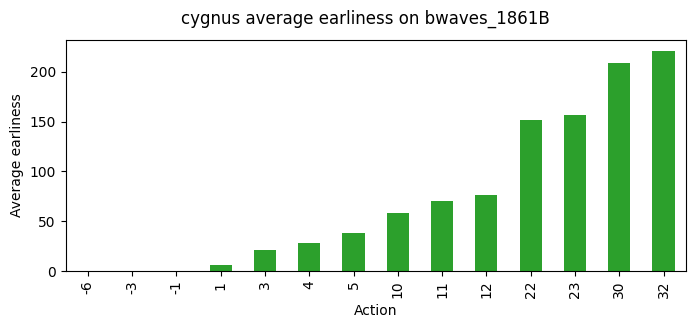

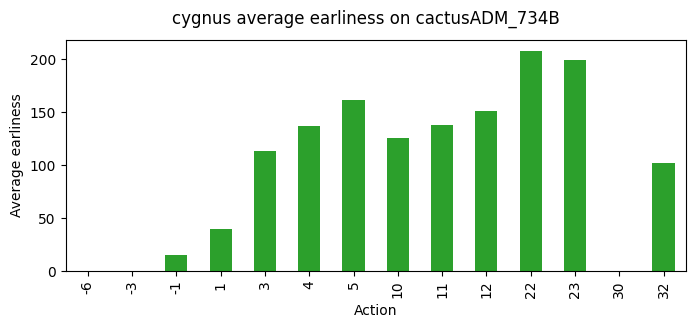

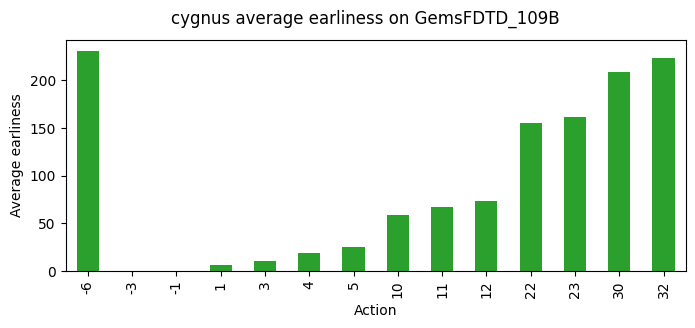

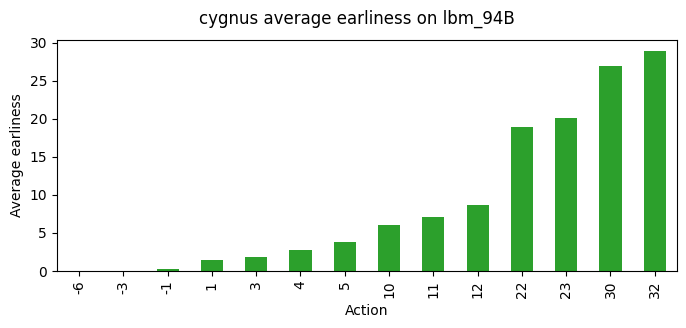

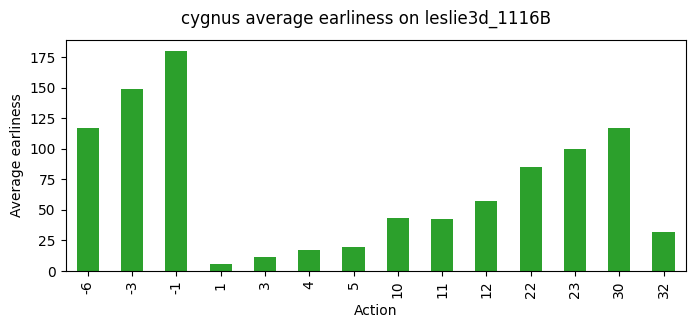

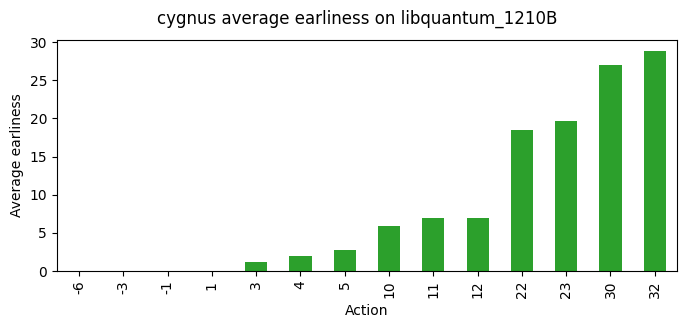

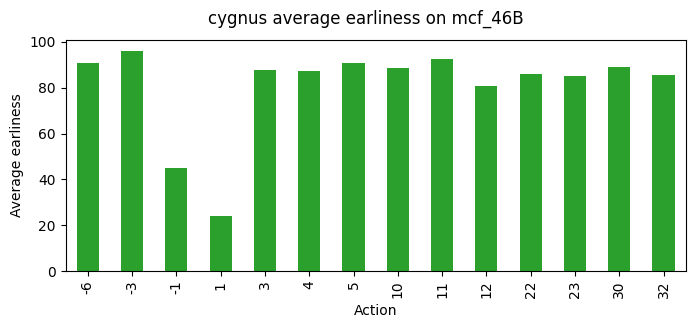

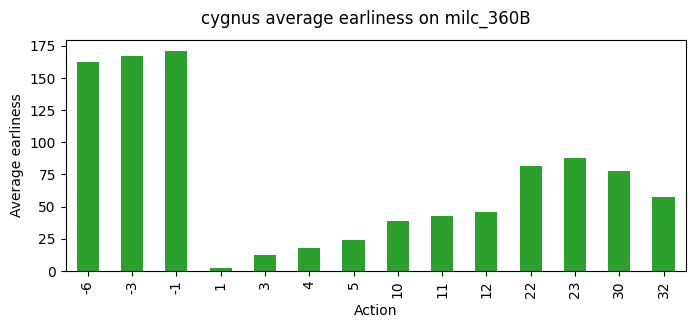

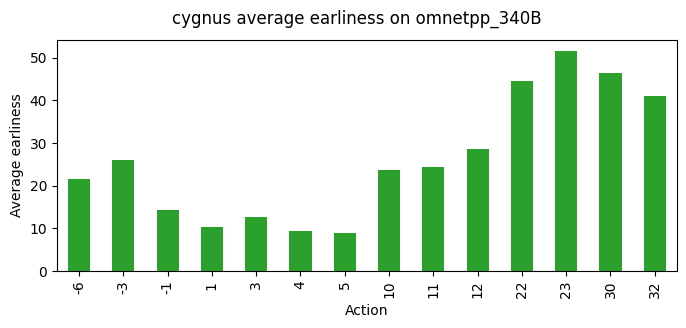

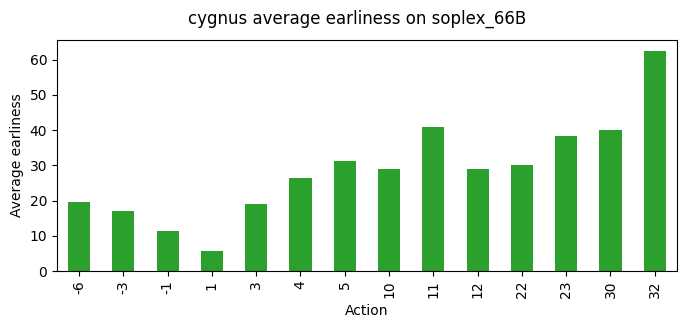

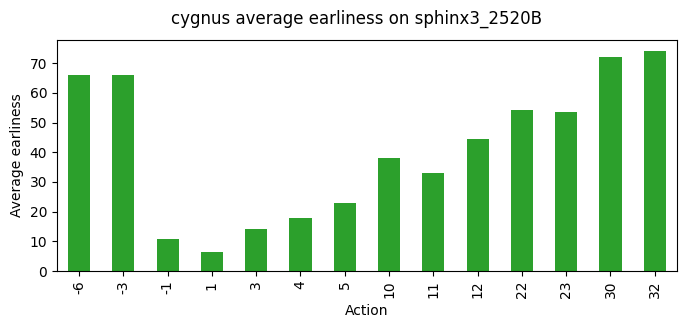

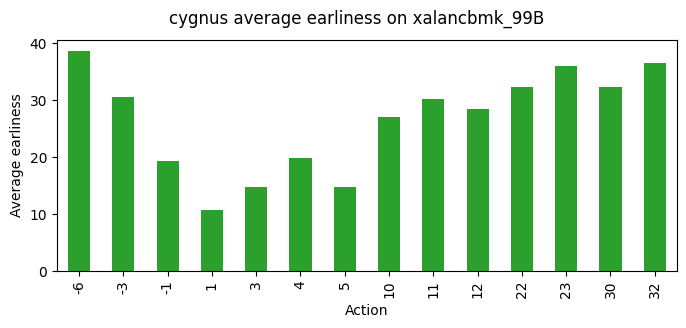

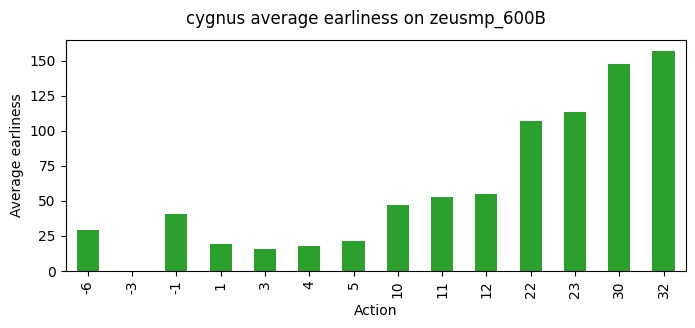

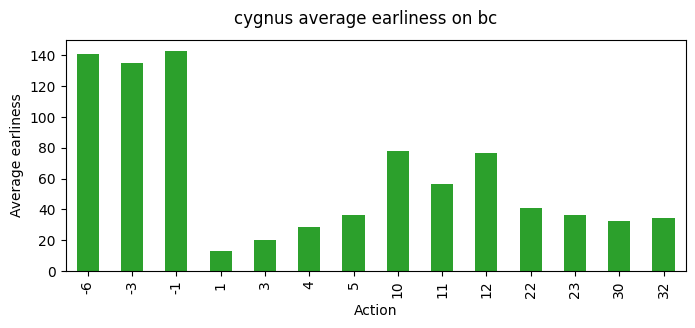

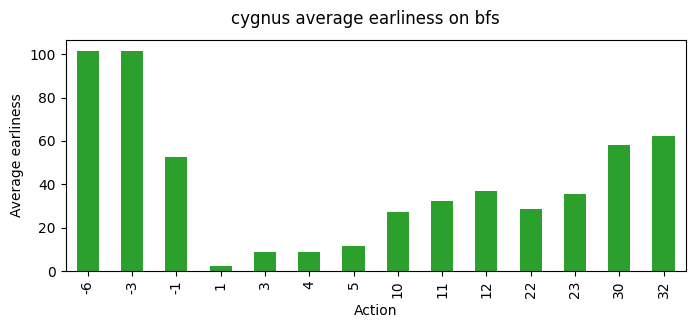

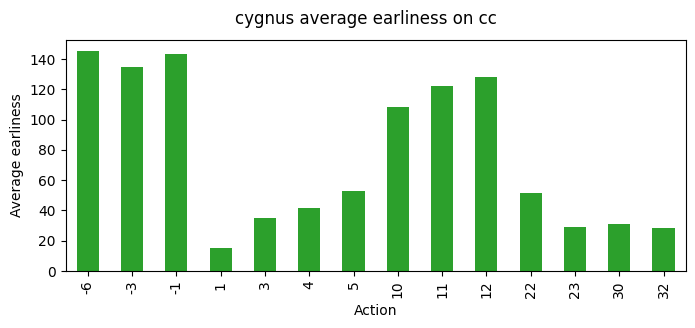

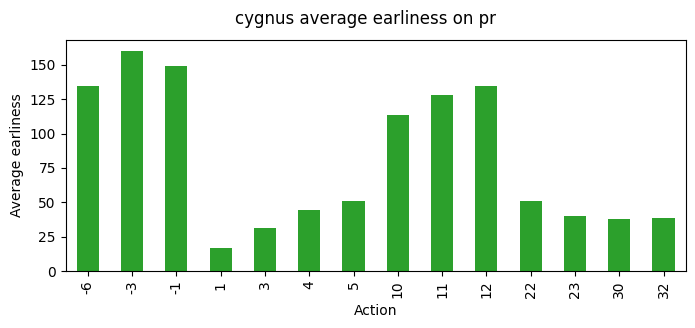

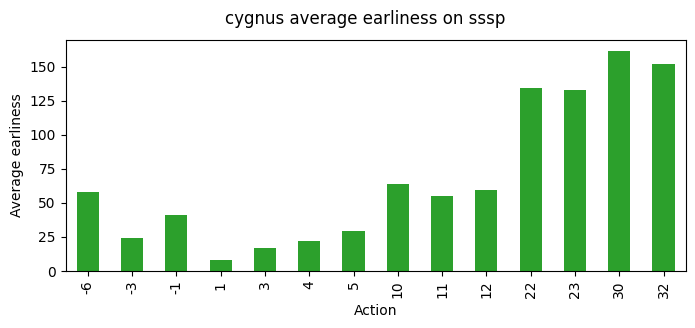

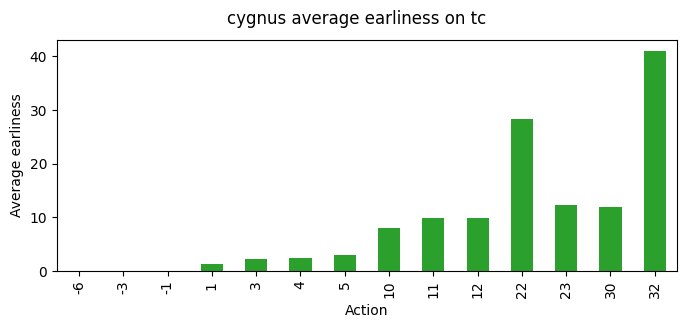

In [20]:
for trace in earliness_tables.keys():
    dict_to_plot(earliness_tables, trace, 'cygnus', color='C2', stat="Average earliness")

## Avg. lateness

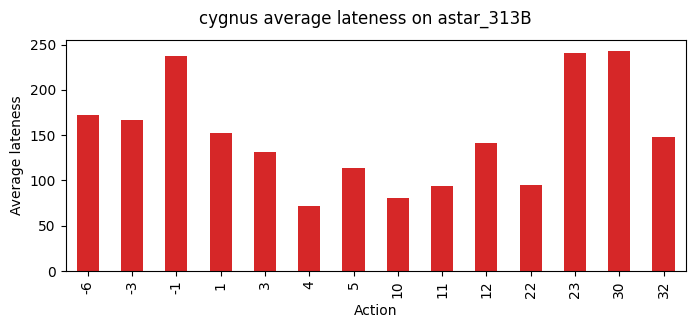

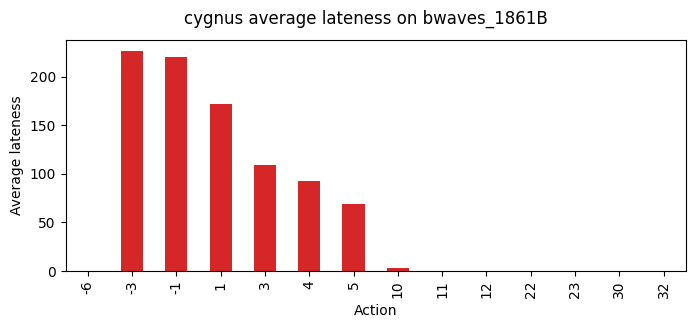

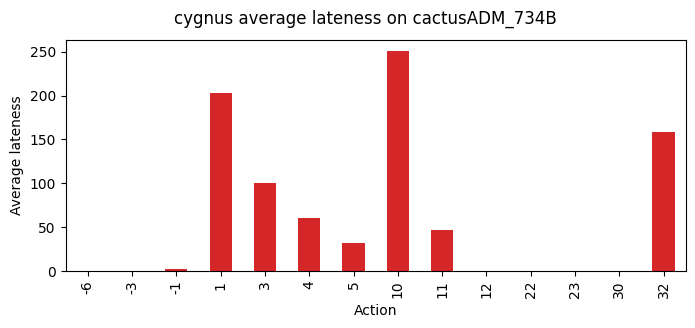

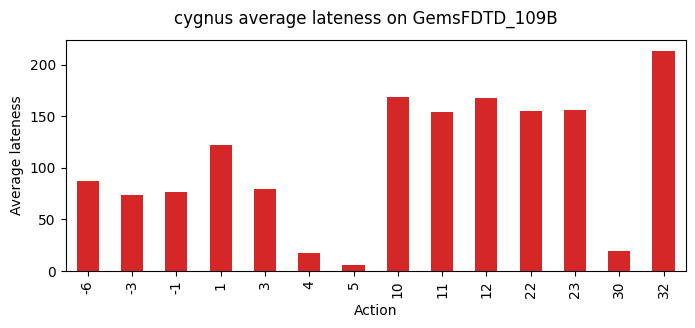

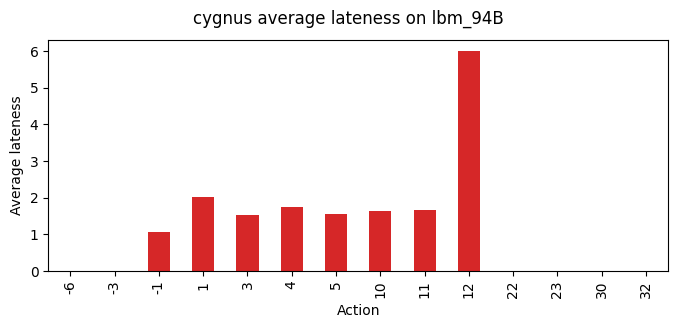

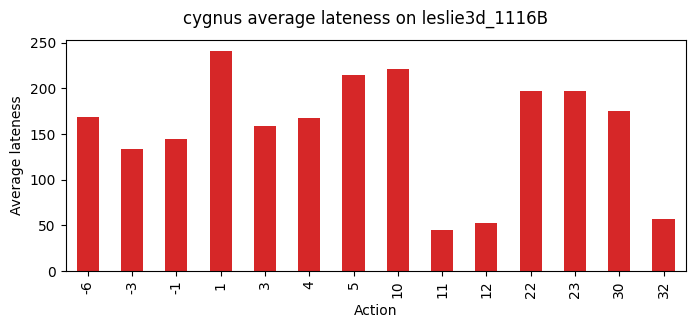

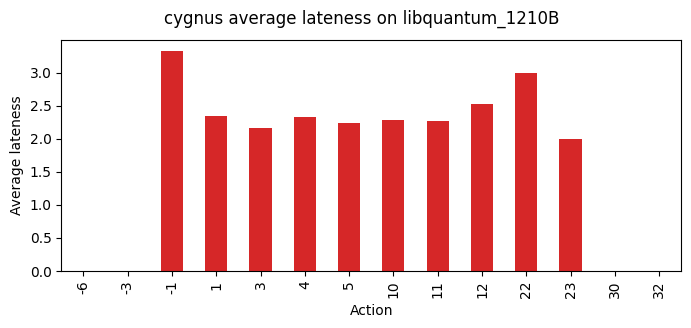

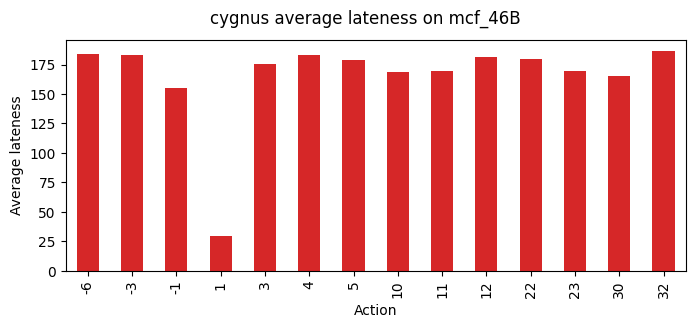

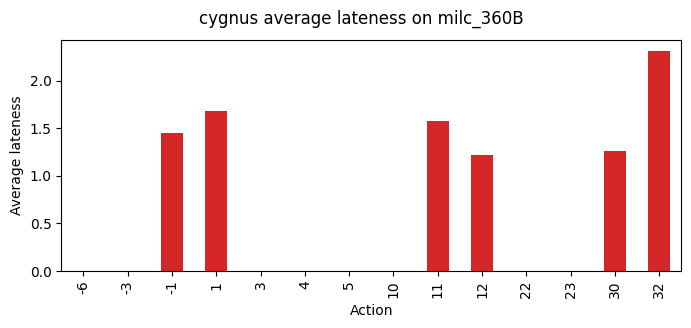

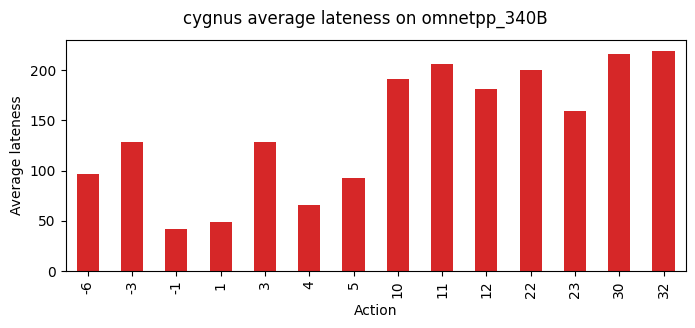

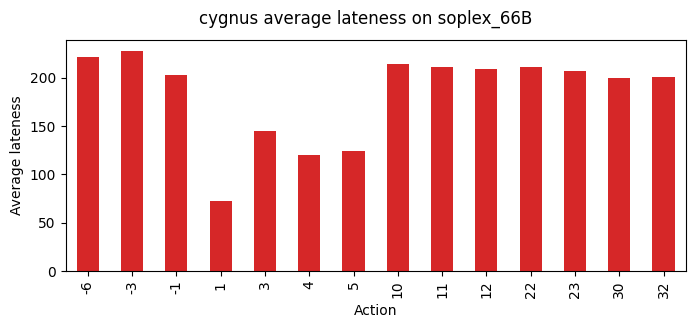

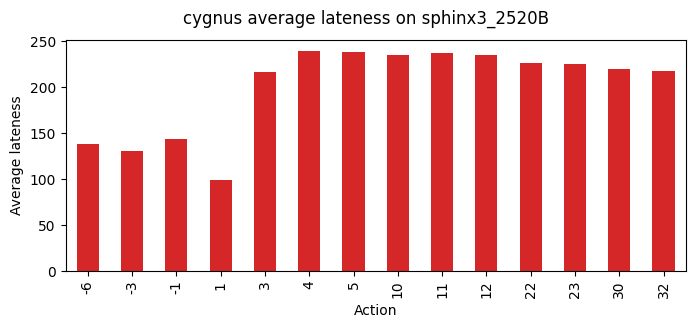

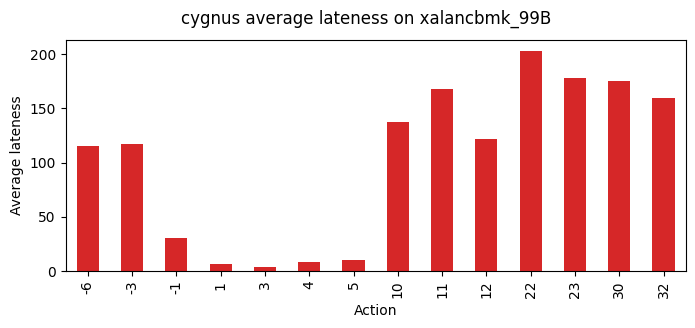

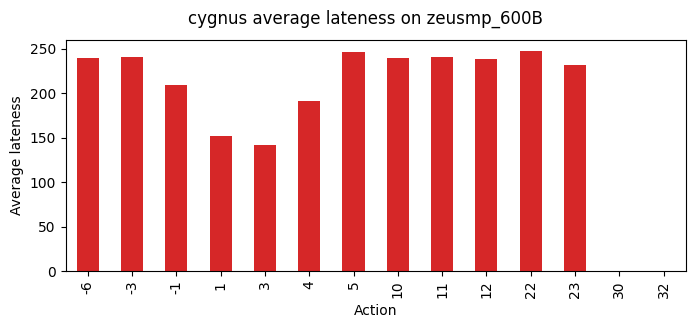

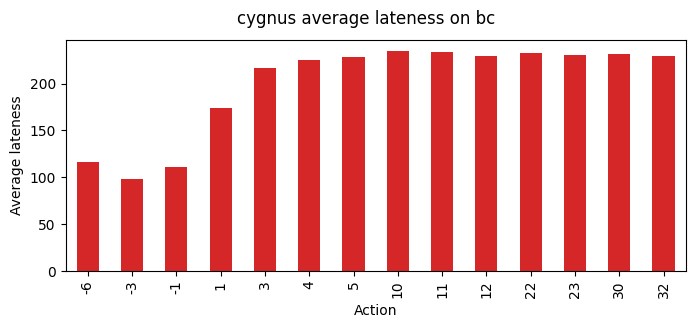

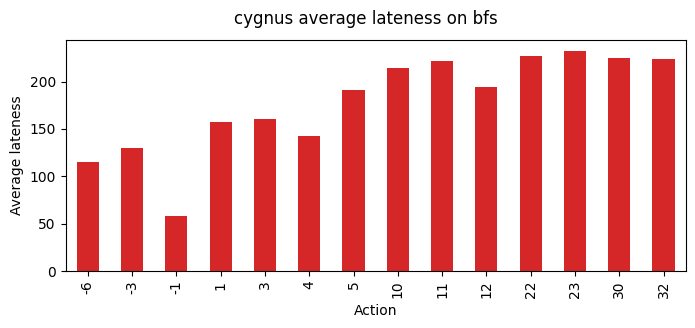

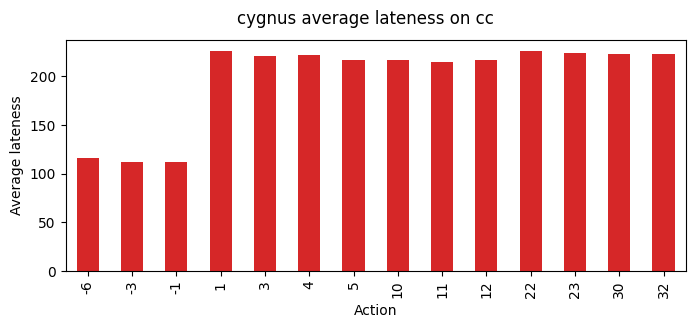

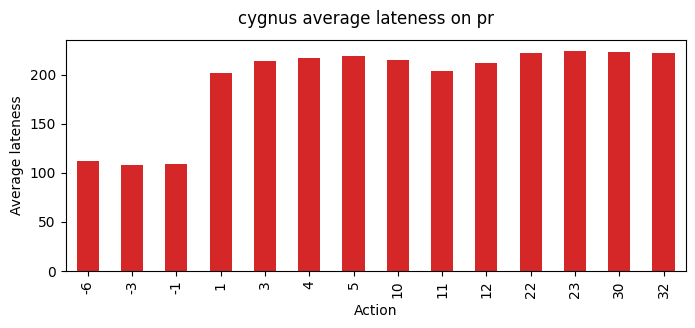

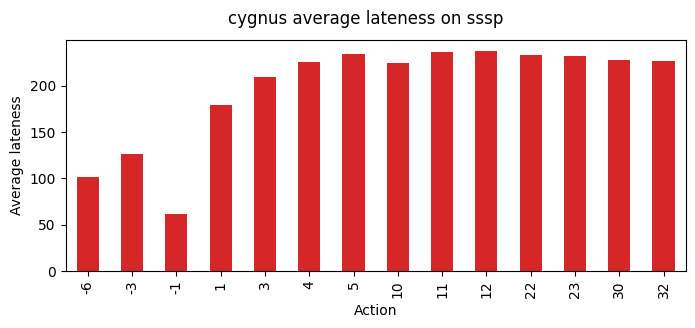

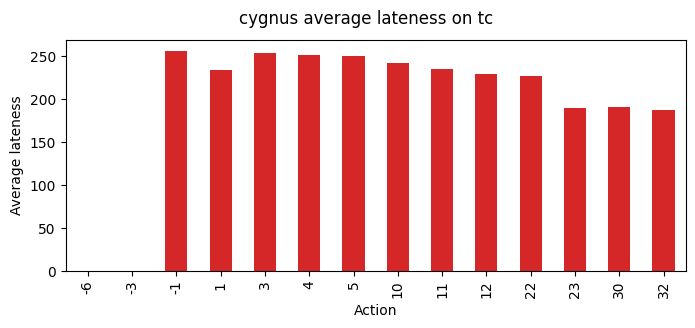

In [19]:
for trace in lateness_tables.keys():
    dict_to_plot(lateness_tables, trace, 'cygnus', color='C3', stat="Average lateness")